#  **Importing Data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/ML/2_coin_data/ttv_coin.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# **Load Data And Split**

In [ ]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/all_coin_2/training',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/all_coin_2/validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/all_coin_2/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 4500 files belonging to 2 classes.
Found 690 files belonging to 2 classes.
Found 1260 files belonging to 2 classes.


# **Normalization**

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_data.map(process)
validation_data = validation_data.map(process)
test_data = test_data.map(process)

# **Import Saved Model**

In [ ]:
model = load_model("vgg16")

# **VGG16 Model Architecture**

# **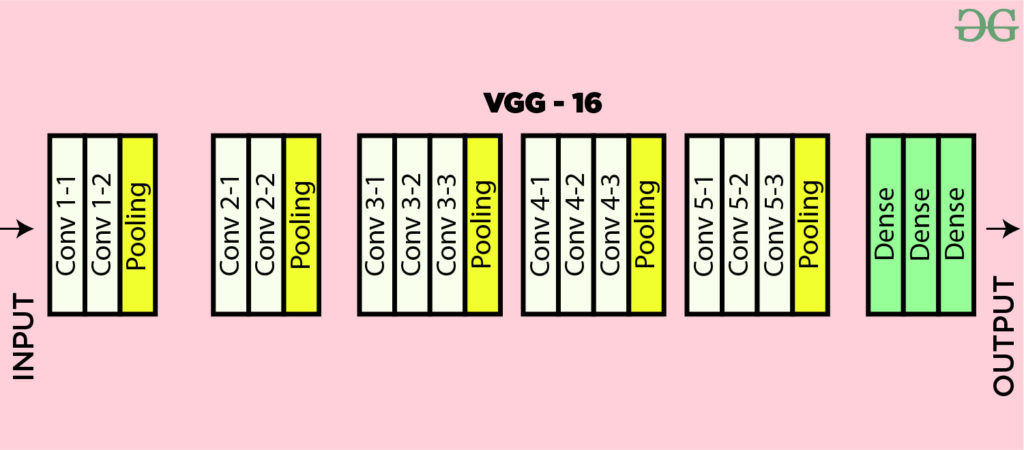**

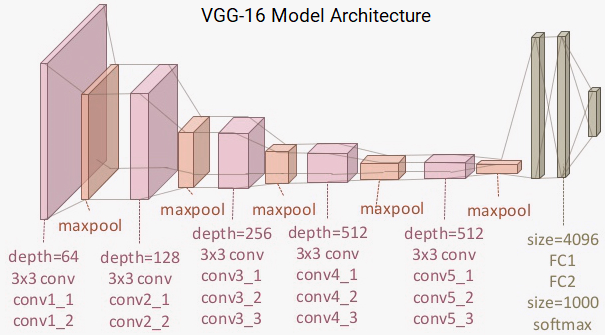

# **Base Model Build (VGG16)**

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
del base_model

# **Base_Model Filters**

In [ ]:
layer = base_model.layers
filters, biases = base_model.layers[1].get_weights()
print(layer[1].name, filters.shape)

block1_conv1 (3, 3, 3, 64)


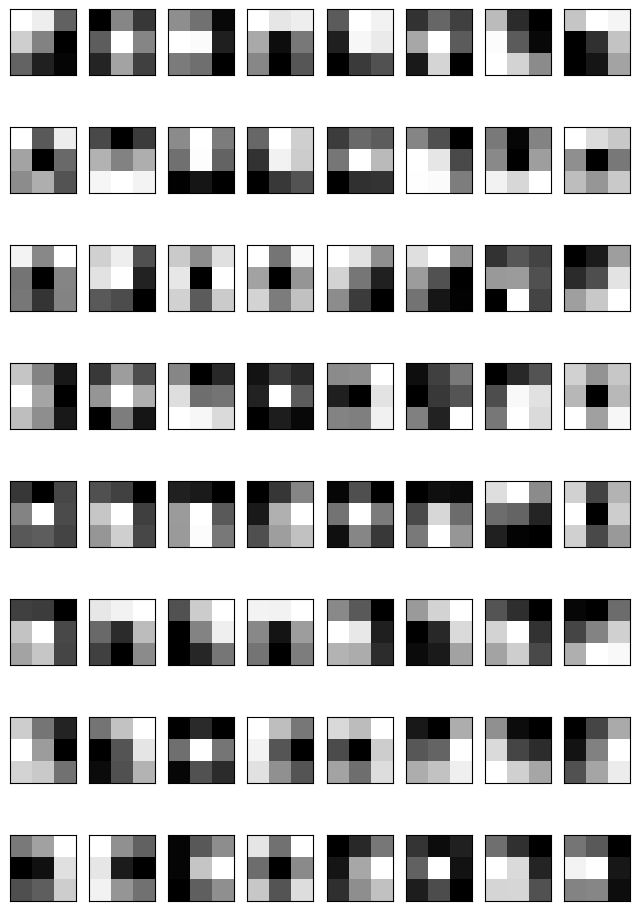

In [ ]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
plt.show()

# **Base_Model Extracted Features**

In [ ]:
conv_layer_index = []
for i in range(len(base_model.layers)):
	if 'conv' in base_model.layers[i].name:
		conv_layer_index.append(i)

outputs = [base_model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=base_model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
img_dir = '/content/all_coin_2/test/real/18f7d0aa-bd38-4019-ad7f-feb3e43181e9.jpg'
img = load_img(img_dir, target_size=(256, 256))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
    plt.show()
    print('\n\n\n')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img_dir = '/content/all_coin_2/test/fake/8b10e9b4-213d-497c-80f8-7465f360e614.jpg'
img = load_img(img_dir, target_size=(256, 256))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
    plt.show()
    print('\n\n\n')

Output hidden; open in https://colab.research.google.com to view.

# **Complete Architecture**

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18917441 (72.16 MB)
Trainable params: 4202753 (16.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

# **Train Model**

In [ ]:
history = model.fit(train_data,epochs=20,validation_data=validation_data,callbacks = [tensorboard_callback])

Epoch 1/20
141/141 [==============================] - 47s 258ms/step - loss: 0.3247 - accuracy: 0.8636 - val_loss: 0.2101 - val_accuracy: 0.9116
Epoch 2/20
141/141 [==============================] - 28s 192ms/step - loss: 0.1275 - accuracy: 0.9516 - val_loss: 0.1554 - val_accuracy: 0.9362
Epoch 3/20
141/141 [==============================] - 29s 198ms/step - loss: 0.0619 - accuracy: 0.9796 - val_loss: 0.3540 - val_accuracy: 0.8913
Epoch 4/20
141/141 [==============================] - 28s 191ms/step - loss: 0.0914 - accuracy: 0.9711 - val_loss: 0.1749 - val_accuracy: 0.9362
Epoch 5/20
141/141 [==============================] - 27s 190ms/step - loss: 0.0273 - accuracy: 0.9920 - val_loss: 0.1823 - val_accuracy: 0.9391
Epoch 6/20
141/141 [==============================] - 28s 197ms/step - loss: 0.0138 - accuracy: 0.9971 - val_loss: 0.2238 - val_accuracy: 0.9362
Epoch 7/20
141/141 [==============================] - 28s 196ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1755 - val_ac

In [ ]:
history.history

{'loss': [0.3247009217739105,
  0.12751154601573944,
  0.06187557056546211,
  0.09139614552259445,
  0.027304410934448242,
  0.013817358762025833,
  0.004176593851298094,
  0.002313145436346531,
  0.0012434403179213405,
  0.0008503663702867925,
  0.0007185960421338677,
  0.0005437022773548961,
  0.0004257402615621686,
  0.0003359185648150742,
  0.0002545428287703544,
  0.0001723045570543036,
  0.00010544930410105735,
  6.23431260464713e-05,
  4.055690806126222e-05,
  2.8446009309845977e-05],
 'accuracy': [0.8635555505752563,
  0.9515555500984192,
  0.9795555472373962,
  0.9711111187934875,
  0.9919999837875366,
  0.9971110820770264,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.21014189720153809,
  0.15543997287750244,
  0.35404592752456665,
  0.17486566305160522,
  0.18230490386486053,
  0.22378996014595032,
  0.17547078430652618,
  0.18033385276794434,
  0.17935264110565186,
  0.181870698928833,
  0.1874632835388183

# **Accuracy Result**

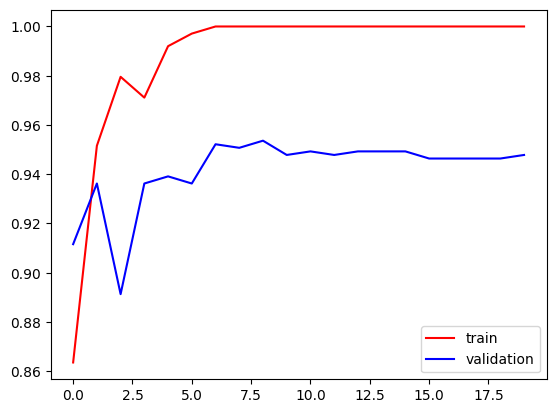

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# **Loss Function Results**

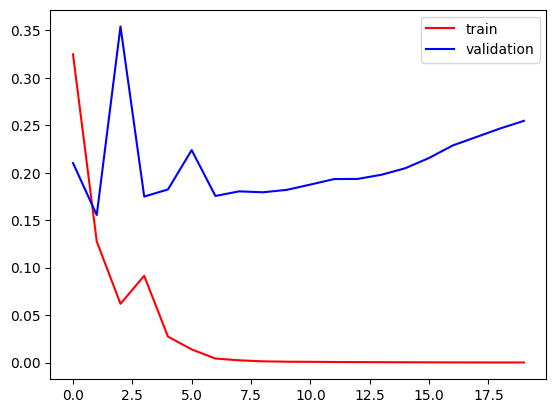

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Test Data Loss , Accuracy and more**

In [ ]:
model.evaluate(test_data)

40/40 [==============================] - 7s 152ms/step - loss: 0.0691 - accuracy: 0.9817


[0.06908201426267624, 0.9817460179328918]

In [ ]:
y_true = []
y_pred = []


for images, labels in test_data:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    binary_predictions = (predictions > 0.5).astype(int)
    y_pred.extend(binary_predictions.flatten())


y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 [==============================] - 0s 37ms/step


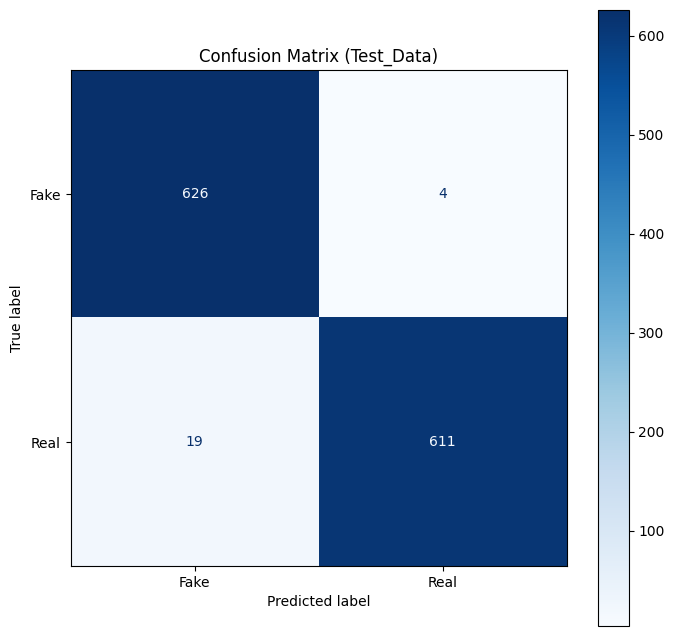

In [ ]:
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Test_Data)')
plt.show()


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       630
           1       0.99      0.97      0.98       630

    accuracy                           0.98      1260
   macro avg       0.98      0.98      0.98      1260
weighted avg       0.98      0.98      0.98      1260



# **Real Time Test**

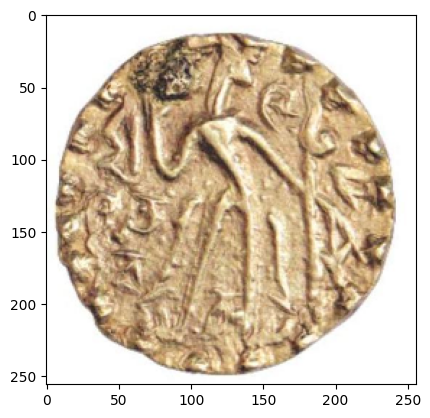

1/1 [==============================] - 0s 118ms/step
[[0.9947246]]
Real


In [ ]:
img_dir = '/content/all_coin_2/test/real/18f7d0aa-bd38-4019-ad7f-feb3e43181e9.jpg'
img = load_img(img_dir, target_size=(256, 256))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = np.expand_dims(img/255, 0)
prediction = model.predict(img)
print(prediction)
if prediction>.5:
  print('Real')
else:
  print('Fake')

In [ ]:
img_dir = '/content/all_coin_2/test/fake'

real = 0
fake = 0

for image in os.listdir(img_dir):
  img_path = os.path.join(img_dir,image)
  img = load_img(img_path, target_size=(256, 256))
  img = img_to_array(img)
  img = np.expand_dims(img/255, 0)
  prediction = model.predict(img)

  if prediction>0.5:
    real+=1
  else:
    fake+=1

print("Real: ",real)
print("Fake: ",fake)

1/1 [==============================] - 0s 26ms/step
Real:  2
Fake:  628


In [ ]:
img_dir = '/content/all_coin_2/test/real'

real = 0
fake = 0

for image in os.listdir(img_dir):
  img_path = os.path.join(img_dir,image)
  img = load_img(img_path, target_size=(256, 256))
  img = img_to_array(img)
  img = np.expand_dims(img/255, 0)
  prediction = model.predict(img)

  if prediction>0.5:
    real+=1
  else:
    fake+=1

print("Real: ",real)
print("Fake: ",fake)

1/1 [==============================] - 0s 28ms/step
Real:  600
Fake:  30


# **Save, Load, And Other necessary statements**

In [ ]:
model.save("vgg16_ttv.h5")
model.save("vgg16_ttv")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model("vgg16")

In [ ]:

!cp -r /content/logs /content/drive/MyDrive/vgg_ttv
!cp -r /content/vgg16_ttv_ /content/drive/MyDrive/vgg_ttv
!cp -r /content/vgg16_ttv.h5 /content/drive/MyDrive/vgg_ttv

In [ ]:

!cp -r /content/drive/MyDrive/vgg16/logs /content
!cp -r /content/drive/MyDrive/ML/3_saved_models/vgg16_model/vgg16 /content
!cp -r /content/drive/MyDrive/ML/3_saved_models/vgg16_model/vgg16.h5 /content

In [ ]:
!cp -r /content/drive/MyDrive/ML/3_saved_models/vgg16_model/vgg16 /content

In [ ]:
rm -rf /content/vgg16.h5